In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copulas.multivariate import VineCopula
from copulas.bivariate import Gumbel
from copulas.bivariate import Clayton
from copulas.bivariate import Frank
from copulas.visualization import scatter_2d
from copulas.visualization import compare_2d

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('joint_6classes_w_acc_z_and_p_gyr_x_separated.csv',index_col=0)
X = dataset.iloc[:, [0,1,2,3,4,5]].values
y1 = dataset.iloc[:, -1].values
y2 = dataset.iloc[:,-2].values
print(dataset)

         p_acc     p_gyr     w_acc     w_gyr   p_gyr_x   w_acc_z      output  \
0     0.005805  0.066241  0.044906  0.027529 -0.085144  2.253403  stairsdown   
1     0.005561  0.086616  0.034901  0.021099 -0.009308  2.272446  stairsdown   
2     0.003957  0.121751  0.027358  0.018112  0.078278  2.215317  stairsdown   
3     0.003085  0.147984  0.025520  0.018567  0.150909  2.234360  stairsdown   
4     0.003142  0.295059  0.021007  0.019318  0.194702  2.258163  stairsdown   
...        ...       ...       ...       ...       ...       ...         ...   
8995  0.001110  0.681533  0.031443  0.193085 -0.124191  6.152451        bike   
8996  0.001742  0.654247  0.025856  0.241054 -0.129532  6.342880        bike   
8997  0.001742  0.673875  0.017093  0.109025 -0.129532  6.209580        bike   
8998  0.002409  0.642786  0.014760  0.065596 -0.126328  6.219101        bike   
8999  0.002089  0.674557  0.006452  0.129141 -0.123123  6.073898        bike   

      target  
0          2  
1        

In [4]:
label = dataset['output']

In [5]:
X

array([[ 5.80519320e-03,  6.62414807e-02,  4.49056148e-02,
         2.75294435e-02, -8.51440400e-02,  2.25340270e+00],
       [ 5.56145117e-03,  8.66161188e-02,  3.49008876e-02,
         2.10990559e-02, -9.30786100e-03,  2.27244570e+00],
       [ 3.95666996e-03,  1.21750655e-01,  2.73576807e-02,
         1.81116163e-02,  7.82775900e-02,  2.21531680e+00],
       ...,
       [ 1.74175694e-03,  6.73875418e-01,  1.70928899e-02,
         1.09024500e-01, -1.29531860e-01,  6.20957950e+00],
       [ 2.40902384e-03,  6.42786321e-01,  1.47600181e-02,
         6.55963728e-02, -1.26327510e-01,  6.21910100e+00],
       [ 2.08905832e-03,  6.74556820e-01,  6.45192446e-03,
         1.29141205e-01, -1.23123170e-01,  6.07389830e+00]])

In [6]:
y1

array([2, 2, 2, ..., 0, 0, 0], dtype=int64)

In [7]:
y2

array(['stairsdown', 'stairsdown', 'stairsdown', ..., 'bike', 'bike',
       'bike'], dtype=object)

In [8]:
data = pd.DataFrame(X,columns=['p_acc','p_gyr','w_acc','w_gyr','p_gyr_x','w_acc_z'])
data

,p_acc,p_gyr,w_acc,w_gyr,p_gyr_x,w_acc_z
0,0.005805,0.066241,0.044906,0.027529,-0.085144,2.253403
1,0.005561,0.086616,0.034901,0.021099,-0.009308,2.272446
2,0.003957,0.121751,0.027358,0.018112,0.078278,2.215317
3,0.003085,0.147984,0.025520,0.018567,0.150909,2.234360
4,0.003142,0.295059,0.021007,0.019318,0.194702,2.258163
...,...,...,...,...,...,...
8995,0.001110,0.681533,0.031443,0.193085,-0.124191,6.152451
8996,0.001742,0.654247,0.025856,0.241054,-0.129532,6.342880
8997,0.001742,0.673875,0.017093,0.109025,-0.129532,6.209580
8998,0.002409,0.642786,0.014760,0.065596,-0.126328,6.219101


In [9]:
df1 = pd.concat((data,dataset['target']),axis=1)
df1

,p_acc,p_gyr,w_acc,w_gyr,p_gyr_x,w_acc_z,target
0,0.005805,0.066241,0.044906,0.027529,-0.085144,2.253403,2
1,0.005561,0.086616,0.034901,0.021099,-0.009308,2.272446,2
2,0.003957,0.121751,0.027358,0.018112,0.078278,2.215317,2
3,0.003085,0.147984,0.025520,0.018567,0.150909,2.234360,2
4,0.003142,0.295059,0.021007,0.019318,0.194702,2.258163,2
...,...,...,...,...,...,...,...
8995,0.001110,0.681533,0.031443,0.193085,-0.124191,6.152451,0
8996,0.001742,0.654247,0.025856,0.241054,-0.129532,6.342880,0
8997,0.001742,0.673875,0.017093,0.109025,-0.129532,6.209580,0
8998,0.002409,0.642786,0.014760,0.065596,-0.126328,6.219101,0


<IPython.core.display.Javascript object>


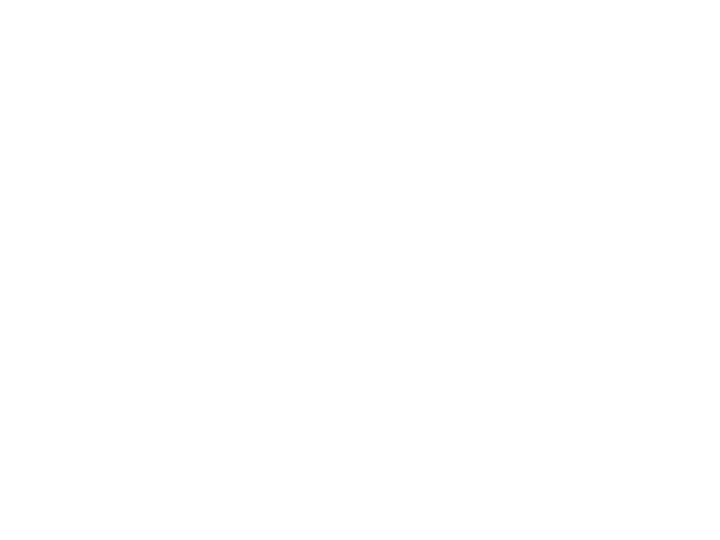

In [10]:
%matplotlib notebook
sns.heatmap(df1.corr(),annot=True,cmap='viridis')
#plt.title('Heatmap after fusion with labels - Rvine',fontsize=16)
plt.show()

In [11]:
df2 = pd.concat((data,label),axis=1)
df2

,p_acc,p_gyr,w_acc,w_gyr,p_gyr_x,w_acc_z,output
0,0.005805,0.066241,0.044906,0.027529,-0.085144,2.253403,stairsdown
1,0.005561,0.086616,0.034901,0.021099,-0.009308,2.272446,stairsdown
2,0.003957,0.121751,0.027358,0.018112,0.078278,2.215317,stairsdown
3,0.003085,0.147984,0.025520,0.018567,0.150909,2.234360,stairsdown
4,0.003142,0.295059,0.021007,0.019318,0.194702,2.258163,stairsdown
...,...,...,...,...,...,...,...
8995,0.001110,0.681533,0.031443,0.193085,-0.124191,6.152451,bike
8996,0.001742,0.654247,0.025856,0.241054,-0.129532,6.342880,bike
8997,0.001742,0.673875,0.017093,0.109025,-0.129532,6.209580,bike
8998,0.002409,0.642786,0.014760,0.065596,-0.126328,6.219101,bike


In [12]:
import ppscore as pps
x = pps.matrix(df2,sample=9000)[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')

<IPython.core.display.Javascript object>


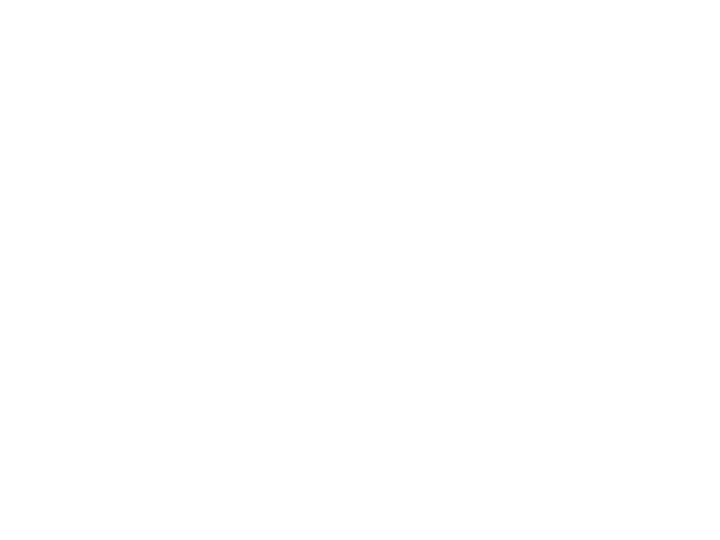

In [13]:
%matplotlib notebook
sns.heatmap(x,annot=True,cmap='Blues')
#plt.title('Heatmap after fusion with labels-Rvine',fontsize=16)
plt.show()

In [14]:
feature1 = [df1['p_gyr'],df1['w_gyr']]
headers = ["p_gyr", "w_gyr"]
df3 = pd.concat(feature1, axis=1, keys=headers)
df3

,p_gyr,w_gyr
0,0.066241,0.027529
1,0.086616,0.021099
2,0.121751,0.018112
3,0.147984,0.018567
4,0.295059,0.019318
...,...,...
8995,0.681533,0.193085
8996,0.654247,0.241054
8997,0.673875,0.109025
8998,0.642786,0.065596


## Fusion

In [15]:
regular = VineCopula('regular')
regular.fit(df3)

In [16]:
parameters = regular.to_dict()
parameters.keys()

dict_keys(['type', 'vine_type', 'fitted', 'n_sample', 'n_var', 'depth', 'truncated', 'trees', 'tau_mat', 'u_matrix', 'unis', 'columns'])

In [17]:
tau_mat = parameters['tau_mat']
tau_mat

[[1.0, 0.5519748305826787], [0.5519748305826787, 1.0]]

In [18]:
u_matrix = parameters['u_matrix']
u_matrix

[[0.23553542273066644, 0.29614073359059223],
 [0.24838449039748026, 0.2895924787495313],
 [0.27077950897391423, 0.2865534248536639],
 [0.2875923314369732, 0.28701658864664126],
 [0.37925136622072175, 0.2877800478519247],
 [0.6459523482981734, 0.2895909291254853],
 [0.5534740487292971, 0.29048292790067953],
 [0.43057146111881184, 0.2928947281449362],
 [0.2619225642996562, 0.29482287180717254],
 [0.23419097214629342, 0.2985121393383876],
 [0.22531034765243768, 0.31368524824487704],
 [0.20902683600048846, 0.33883633218622666],
 [0.21837799866986948, 0.3317037578479033],
 [0.20318862126504322, 0.29700641872605743],
 [0.20127457804444418, 0.2805284226723479],
 [0.20111161960480795, 0.2765779097390564],
 [0.20260023926087234, 0.27467208061842663],
 [0.20675938387675974, 0.27351635643674294],
 [0.21225577031777723, 0.2728261233613417],
 [0.21597384813475545, 0.2720080783732689],
 [0.22193879927048232, 0.2713154849242608],
 [0.2685494447070227, 0.27086376871731743],
 [0.2327453651605163, 0.270

In [19]:
trees = parameters['trees']
print('Number of the trees:',len(trees))

Number of the trees: 1


In [20]:
d4_r12 = trees[0]['edges'][0]

In [21]:
print('r12:',d4_r12['name'])

r12: CopulaTypes.FRANK


In [22]:
f1 = regular.unis[0].probability_density(df3['p_gyr'])

[Text(0, 0.5, 'density'),
 Text(0.5, 1.0, 'Marginal density of phone gyroscope')]

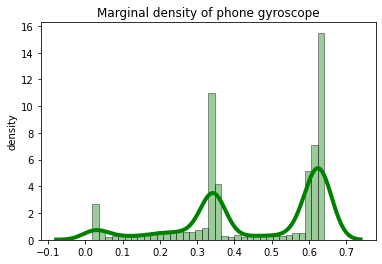

In [23]:
%matplotlib inline
ax = sns.distplot(f1, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(ylabel="density",title="Marginal density of phone gyroscope")

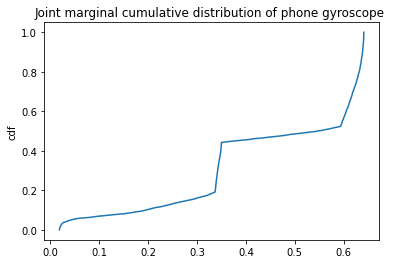

In [24]:
N = 9000
  
# normal distribution
dist = f1
  
# sort the data in ascending order
x = np.sort(dist)
  
# get the cdf values of y
y = np.arange(N) / float(N)
  
# plotting
#plt.xlabel('values')
plt.ylabel('cdf')
  
plt.title('Joint marginal cumulative distribution of phone gyroscope ')
  
plt.plot(x, y)

In [25]:
f2 = regular.unis[1].probability_density(df3['w_gyr'])

[Text(0, 0.5, 'density'),
 Text(0.5, 1.0, 'Marginal density of watch gyroscope')]

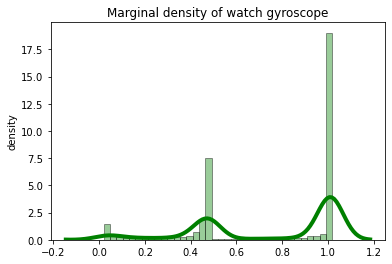

In [26]:
ax = sns.distplot(f2, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(ylabel="density",title="Marginal density of watch gyroscope")

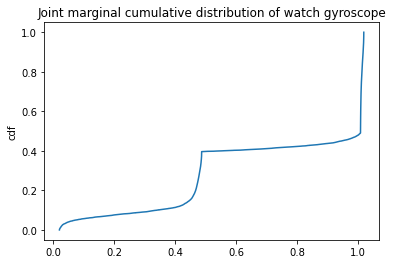

In [27]:
N = 9000
  
# normal distribution
dist = f2
  
# sort the data in ascending order
x = np.sort(dist)
  
# get the cdf values of y
y = np.arange(N) / float(N)
  
# plotting
#plt.xlabel('values')
plt.ylabel('cdf')
  
plt.title('Joint marginal cumulative distribution of watch gyroscope')
  
plt.plot(x, y)

In [28]:
print(d4_r12.keys())

dict_keys(['index', 'L', 'R', 'D', 'parents', 'neighbors', 'name', 'theta', 'tau', 'U', 'likelihood'])


In [29]:
print(d4_r12['tau'])

0.5519748305826787


In [30]:
d4_r12_marginal_data = np.array([d4_r12['U'][0],d4_r12['U'][1]])

In [31]:
d4_r12_marginal_data1 = []
for i in range(len(d4_r12['U'][0])):
    sin = []
    sin.append(d4_r12_marginal_data[0][i])
    sin.append(d4_r12_marginal_data[1][i])
    d4_r12_marginal_data1.append(sin)

In [32]:
d4_r12_marginal_data1 = np.array(d4_r12_marginal_data1)

In [33]:
frank = Frank()
frank.tau = d4_r12['tau']
frank.theta = d4_r12['theta']
d4_joint_r12 = frank.probability_density(d4_r12_marginal_data1)
len(d4_joint_r12)

9000

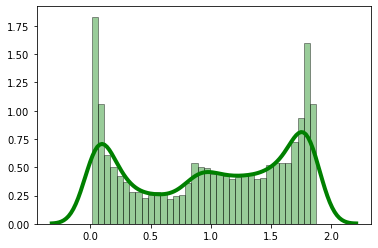

In [34]:
ax = sns.distplot(d4_joint_r12, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [35]:
joint = [f2[i]*f1[i]*d4_joint_r12[i] for i in range(len(d4_joint_r12))] 

In [36]:
print(joint)

[0.682948789581029, 0.9031330212068617, 1.1360726167888935, 1.1835222862540675, 0.39584966333895816, 0.00041606392853446746, 0.011964307918613758, 0.15481615570630547, 0.998560359543578, 0.6434157998439697, 0.42074870783652335, 0.18892302790545137, 0.2620198164785822, 0.36169329482943124, 0.465546489521517, 0.49640715137198377, 0.5278465212497102, 0.5826301667713499, 0.6511617817437227, 0.7028461774052359, 0.7812929944535504, 1.1730005169105402, 0.916526585004607, 0.3880992473528977, 0.02790400450233775, 0.0003464250372605791, 0.039082400638738184, 0.4087014809166251, 0.6979737641368812, 0.6400841929127669, 0.36368305826515884, 0.13462071531089484, 0.045589370900177915, 0.06672898388745263, 0.28389916491352923, 0.6635215936995464, 0.7992706390691291, 0.7530792903362715, 0.4618088844101749, 0.24220956417730302, 0.11829760207179787, 0.06697352596594822, 0.051461360707161806, 0.03953854559365542, 0.03659065950108476, 0.049950997529739666, 0.1150095673772682, 0.33407889983379413, 0.8312968

In [37]:
print(len(joint))

9000


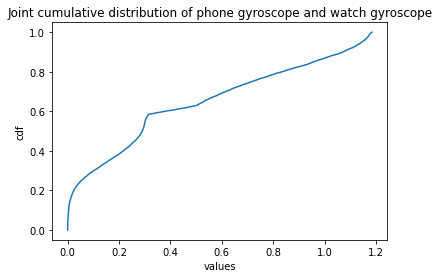

In [38]:
# No of data points used
N = 9000
  
# normal distribution
dist = joint
  
# sort the data in ascending order
x = np.sort(dist)
  
# get the cdf values of y
y = np.arange(N) / float(N)
  
# plotting
plt.xlabel('values')
plt.ylabel('cdf')
  
plt.title('Joint cumulative distribution of phone gyroscope and watch gyroscope')
  
plt.plot(x, y)

[Text(0.5, 1.0, 'Joint probability density of phone gyroscope and watch gyroscope')]

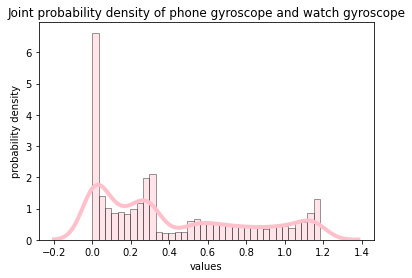

In [39]:
ax = sns.distplot(joint, hist=True, kde=True, 
             bins=int(180/5), color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='values',ylabel='probability density')
ax.set(title="Joint probability density of phone gyroscope and watch gyroscope")

In [40]:
df4 = pd.DataFrame(joint)
df4.columns = ["feature"]
df4

,feature
0,0.682949
1,0.903133
2,1.136073
3,1.183522
4,0.395850
...,...
8995,0.151550
8996,0.278197
8997,0.049772
8998,0.032592


In [41]:
data = data.drop(['p_gyr','w_gyr'],axis=1)
data

,p_acc,w_acc,p_gyr_x,w_acc_z
0,0.005805,0.044906,-0.085144,2.253403
1,0.005561,0.034901,-0.009308,2.272446
2,0.003957,0.027358,0.078278,2.215317
3,0.003085,0.025520,0.150909,2.234360
4,0.003142,0.021007,0.194702,2.258163
...,...,...,...,...
8995,0.001110,0.031443,-0.124191,6.152451
8996,0.001742,0.025856,-0.129532,6.342880
8997,0.001742,0.017093,-0.129532,6.209580
8998,0.002409,0.014760,-0.126328,6.219101


In [42]:
df = pd.concat((data,df4,label),axis=1)
df

,p_acc,w_acc,p_gyr_x,w_acc_z,feature,output
0,0.005805,0.044906,-0.085144,2.253403,0.682949,stairsdown
1,0.005561,0.034901,-0.009308,2.272446,0.903133,stairsdown
2,0.003957,0.027358,0.078278,2.215317,1.136073,stairsdown
3,0.003085,0.025520,0.150909,2.234360,1.183522,stairsdown
4,0.003142,0.021007,0.194702,2.258163,0.395850,stairsdown
...,...,...,...,...,...,...
8995,0.001110,0.031443,-0.124191,6.152451,0.151550,bike
8996,0.001742,0.025856,-0.129532,6.342880,0.278197,bike
8997,0.001742,0.017093,-0.129532,6.209580,0.049772,bike
8998,0.002409,0.014760,-0.126328,6.219101,0.032592,bike


<IPython.core.display.Javascript object>


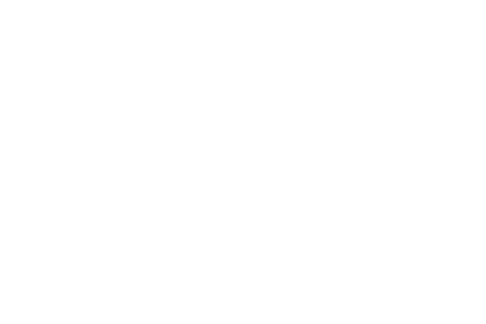

In [43]:
%matplotlib notebook
sns.heatmap(df.corr(),annot=True,cmap='viridis')
#plt.title('Heatmap after fusion with labels - Rvine',fontsize=16)
plt.show()

In [44]:
import ppscore as pps
x = pps.matrix(df,sample=9000)[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')

<IPython.core.display.Javascript object>


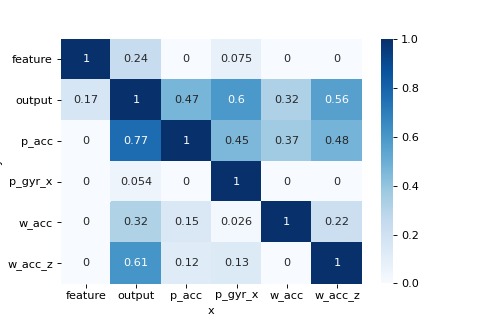

In [45]:
%matplotlib notebook
sns.heatmap(x,annot=True,cmap='Blues')
#plt.title('Heatmap after fusion with labels-Rvine',fontsize=16)
plt.show()

## CLassification

In [46]:
X1 = df.iloc[:, [0,1,2,3,4]].values
y1 = df.iloc[:, -1].values

In [47]:
X1

array([[ 5.80519320e-03,  4.49056148e-02, -8.51440400e-02,
         2.25340270e+00,  6.82948790e-01],
       [ 5.56145117e-03,  3.49008876e-02, -9.30786100e-03,
         2.27244570e+00,  9.03133021e-01],
       [ 3.95666996e-03,  2.73576807e-02,  7.82775900e-02,
         2.21531680e+00,  1.13607262e+00],
       ...,
       [ 1.74175694e-03,  1.70928899e-02, -1.29531860e-01,
         6.20957950e+00,  4.97716847e-02],
       [ 2.40902384e-03,  1.47600181e-02, -1.26327510e-01,
         6.21910100e+00,  3.25920127e-02],
       [ 2.08905832e-03,  6.45192446e-03, -1.23123170e-01,
         6.07389830e+00,  6.68601508e-02]])

In [48]:
y1

array(['stairsdown', 'stairsdown', 'stairsdown', ..., 'bike', 'bike',
       'bike'], dtype=object)

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.1, random_state = 0)

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
# Predicting the Test set results
y_pred  = classifier.predict(X_test)

In [53]:
y_pred

array(['sit', 'stairsup', 'bike', 'bike', 'stairsup', 'sit', 'stairsdown',
       'bike', 'stairsdown', 'stairsup', 'stand', 'stairsdown', 'bike',
       'bike', 'stand', 'bike', 'stand', 'stairsup', 'bike', 'sit', 'sit',
       'bike', 'stairsup', 'bike', 'sit', 'stairsdown', 'stairsdown',
       'sit', 'bike', 'stand', 'stairsdown', 'walk', 'sit', 'stairsdown',
       'walk', 'bike', 'walk', 'bike', 'stairsup', 'stairsdown', 'walk',
       'stairsup', 'bike', 'stairsup', 'sit', 'stairsup', 'stand', 'bike',
       'stand', 'bike', 'sit', 'sit', 'stairsdown', 'stairsdown', 'sit',
       'stand', 'stand', 'stairsup', 'bike', 'stairsup', 'bike', 'bike',
       'walk', 'stairsup', 'stand', 'walk', 'stairsdown', 'stairsup',
       'stairsup', 'stairsdown', 'sit', 'stand', 'bike', 'stairsdown',
       'bike', 'bike', 'stand', 'bike', 'sit', 'bike', 'stairsdown',
       'stand', 'stand', 'sit', 'walk', 'stairsup', 'bike', 'walk', 'sit',
       'stairsup', 'stairsup', 'stairsdown', 'bike', 'w

In [54]:
y_test

array(['sit', 'stairsup', 'bike', 'bike', 'stairsup', 'sit', 'stairsdown',
       'bike', 'stairsdown', 'stairsup', 'stand', 'stairsdown', 'bike',
       'bike', 'stand', 'bike', 'stand', 'stairsup', 'bike', 'sit', 'sit',
       'bike', 'stairsup', 'bike', 'sit', 'stairsdown', 'stairsdown',
       'sit', 'bike', 'stand', 'stairsdown', 'walk', 'sit', 'stairsdown',
       'walk', 'bike', 'stairsdown', 'bike', 'stairsup', 'stairsdown',
       'walk', 'stairsup', 'bike', 'stairsup', 'sit', 'stairsup', 'stand',
       'bike', 'stand', 'bike', 'sit', 'sit', 'stairsdown', 'stairsdown',
       'sit', 'stand', 'stand', 'stairsup', 'bike', 'stairsup', 'bike',
       'bike', 'walk', 'stairsup', 'stand', 'walk', 'stairsdown',
       'stairsup', 'stairsup', 'stairsdown', 'sit', 'stand', 'bike',
       'stairsdown', 'bike', 'bike', 'stand', 'bike', 'sit', 'bike',
       'stairsdown', 'stand', 'stand', 'sit', 'walk', 'stairsdown',
       'bike', 'stairsdown', 'sit', 'stairsup', 'stairsup', 'stairsdow

In [55]:
# Making the Confusion Matrix and accuracy_Score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
accuracy_score(y_test,y_pred)

0.9777777777777777

In [56]:
confusion_matrix(y_test,y_pred)

array([[163,   0,   2,   0,   0,   0],
       [  0, 149,   0,   0,   0,   0],
       [  0,   0, 134,   2,   0,   9],
       [  0,   0,   0, 141,   0,   0],
       [  0,   0,   0,   0, 158,   0],
       [  0,   0,   7,   0,   0, 135]], dtype=int64)

In [57]:
f1_score(y_test, y_pred, average='macro')

0.9769119475191271